### Improting Libraries

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

### Define Face Detection Function

In [14]:
# Load the pre-trained face detector model
detector = dlib.get_frontal_face_detector()

def detect_faces_in_image(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = img.shape

    # Detect faces using dlib's detector
    faces = detector(img, 1)

    # Extract and return face coordinates if any faces are found
    face_locations = []
    for face in faces:
        # Calculate face size as a percentage of the image size
        face_width = face.right() - face.left()
        face_height = face.bottom() - face.top()
        face_size = (face_width * face_height) / (width * height)

        if face_size >= 0.001:  # Check if face size is at least 0.1% of the image
            face_locations.append(face)

    return face_locations

### Face Detection for One Image

In [ ]:
image_path = 'test1/IMG_4482-1.JPG'
face_locations = detect_faces_in_image(image_path)

if face_locations:
    print("Detected faces:")
    for face_location in face_locations:
        x, y, w, h = face_location
        print(f" - Face at coordinates: ({x}, {y}), ({w}, {h})")

    # Read the image in color for visualization
    img = cv2.imread(image_path)

    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create a matplotlib figure and plot the image
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.title("Image with Detected Faces")

    # Draw rectangles around detected faces
    for face_location in face_locations:
        x, y, right, bottom = face_location
        # Draw white outline
        plt.gca().add_patch(plt.Rectangle((x, y), right - x, bottom - y, edgecolor='white', linewidth=3, fill=False))
    
        # Draw red inner rectangle
        plt.gca().add_patch(plt.Rectangle((x, y), right - x, bottom - y, edgecolor='black', linewidth=1, fill=False))

    plt.axis('off')  # Hide matplotlib axes
    plt.show()

else:
    print("No faces detected in the image.")

No faces detected in the image.


### Face Detection for Entier Folder

Detected faces:
 - Face at coordinates: (1047, 593), (1232, 779)


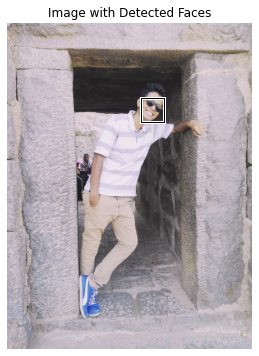

No faces detected in the image.
No faces detected in the image.
No faces detected in the image.
No faces detected in the image.
No faces detected in the image.
No faces detected in the image.


In [18]:
# Path to the directory containing test images
image_dir = 'test1'

# Process all images in the directory
for image_name in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_name)

    # Skip non-image files
    if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    face_locations = detect_faces_in_image(image_path)

    if face_locations:
        print("Detected faces:")
        for face_location in face_locations:
            x, y, w, h = face_location.left(), face_location.top(), face_location.right(), face_location.bottom()
            print(f" - Face at coordinates: ({x}, {y}), ({w}, {h})")

        # Read the image in color for visualization
        img = cv2.imread(image_path)

        # Convert BGR to RGB for matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Create a matplotlib figure and plot the image
        plt.figure(figsize=(10, 6))
        plt.imshow(img_rgb)
        plt.title("Image with Detected Faces")

        # Draw rectangles around detected faces
        for face_location in face_locations:
            x, y = face_location.left(), face_location.top()
            right, bottom = face_location.right(), face_location.bottom()
            # Draw white outline
            plt.gca().add_patch(plt.Rectangle((x, y), right - x, bottom - y, edgecolor='white', linewidth=3, fill=False))
        
            # Draw red inner rectangle
            plt.gca().add_patch(plt.Rectangle((x, y), right - x, bottom - y, edgecolor='black', linewidth=1, fill=False))

        plt.axis('off')  # Hide matplotlib axes
        plt.show()

    else:
        print("No faces detected in the image.")

### Face Detection for Entire Folder with Image Segregation into Folders

In [13]:
# Path to the directory containing test images
image_dir = 'test1'
detected_faces_dir = 'detected_faces_test'
no_face_dir = 'no_face_test'

# Create directories if they do not exist
os.makedirs(detected_faces_dir, exist_ok=True)
os.makedirs(no_face_dir, exist_ok=True)

# Get list of image paths
image_paths = [os.path.join(image_dir, image_name) for image_name in os.listdir(image_dir)
               if image_name.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process all images with a progress bar
for image_path in tqdm(image_paths, desc="Processing Images", unit="image"):
    face_locations = detect_faces_in_image(image_path)

    # Read the image in color for saving
    img = cv2.imread(image_path)

    if face_locations:
        # Draw rectangles around detected faces
        for face in face_locations:
            x, y, w, h = face.left(), face.top(), face.right(), face.bottom()
            # Draw white outline
            cv2.rectangle(img, (x, y), (w, h), (255, 255, 255), 20)
            # Draw black inner rectangle
            cv2.rectangle(img, (x, y), (w, h), (0, 0, 0), 10)

        # Save image to 'detected_faces' folder
        cv2.imwrite(os.path.join(detected_faces_dir, os.path.basename(image_path)), img)
    else:
        # Save image to 'no_face' folder
        cv2.imwrite(os.path.join(no_face_dir, os.path.basename(image_path)), img)


Processing Images: 100%|██████████| 7/7 [00:14<00:00,  2.02s/image]
